# Time Series Analysis and Forecasting with Exponential Smoothing and Holt-Winters in Python

---

# 1. Import Libraries and Data
Import the pandas library and the exponential smoothing function from statsmodels. Load the data and call it df. Include the date variable in the index. Inspect the first 5 rows of the data and describe it.

In [1]:
# Import the pandas and exponential smoothing function by running the following:
#libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

Load the data using the pd.read_csv() function. The index_col and parse_dates parameters should be included as the dates should be in the correct format (YYYY-MM-DD) and in the index. Inspect the first five rows by using the command df.head()

In [2]:
#Load the data using the pandas library
df = pd.read_csv("choco_monthly_revenue.csv", index_col = 0, parse_dates = True)
df.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


# 2. Plot the Data and Date Frequency
Make a simple plot to get to know the data and write a first description of the data. Check the index frequency and adjust, if necessary.

<Axes: xlabel='Month with Year'>

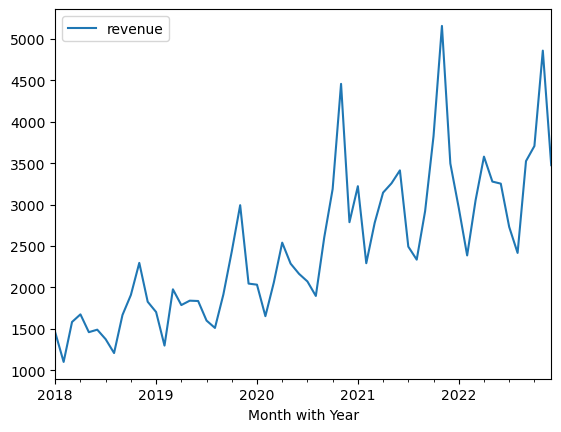

In [3]:
# Create a simple visualization by using the plot() function from Pandas
#Plotting the Time Series
df.plot()
# The data is growing over time and it appears to have seasonal cycles with larger fluctuations over time. 
# Therefore, the seasonality should be multiplicative.

In [4]:
# Check the data frequency by calling the index and observing the outcome.
#Checking the current Frequency of the data
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [5]:
# Specify the Frequency to Monthly. Since it is the first of each month, set the frequency to Monthly Start.

#specify that the data frequency is monthly start
df = df.asfreq("MS")
df.index
# The new frequency is "Monthly Start" or "MS".

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

# 3. Understand the Seasonality
Import the functions to better get to know the seasonal patterns of the data. Use them to visualize the monthly cycles.

In [6]:
# Import the two functions from the documentation

#Import seasonality functions
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot

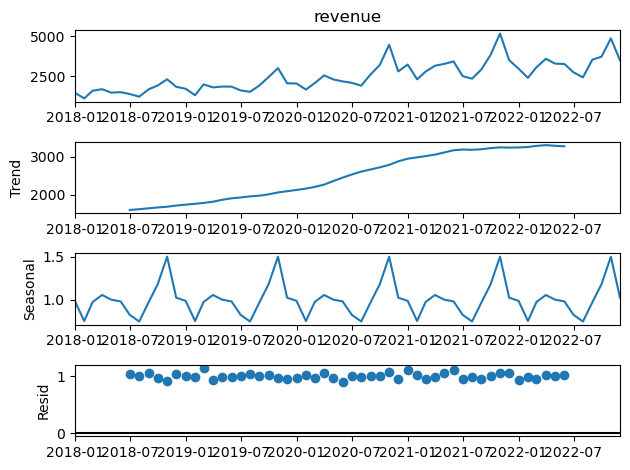

In [7]:
# Use the seasonal decompose function and plot the object created

#Seasonal Decomposition
#since the fluctuations seem to grow overtime, the appropriate model is multiplicative
#period: 12 for monthly, 52 for weekly, 7 for daily, 4 for quarterly
decomposition = seasonal_decompose(x = df.revenue,
                                   model = 'multiplicative',
                                   period = 12)
decomposition.plot();

The trend is growing over time, though it is currently plateauing. The seasonal cycles have a strong peak in what seems to be November.

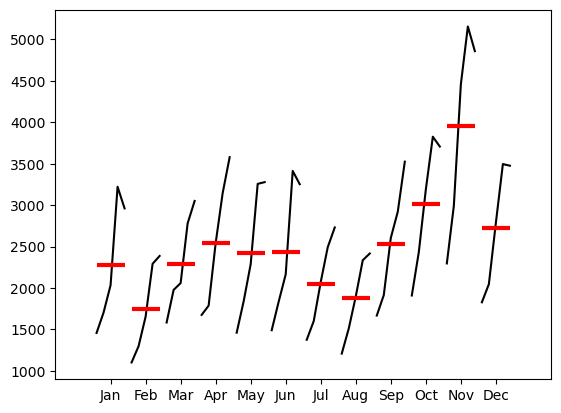

In [8]:
# Look closer into the monthly seasonality with the month_plot() function.

#Seasonal graphs
month_plot(df.revenue);
# The month with the highest seasonality is indeed November, followed by October. February and August rank last.

# 4. Plot the Auto-correlation
Import the function to plot auto-correlation. Assess which periods contribute the most information for the time series forecasting.

In [9]:
# Import the function to plot the auto-correlation.

#Import the function to plot the auto-correlation
from statsmodels.graphics.tsaplots import plot_acf

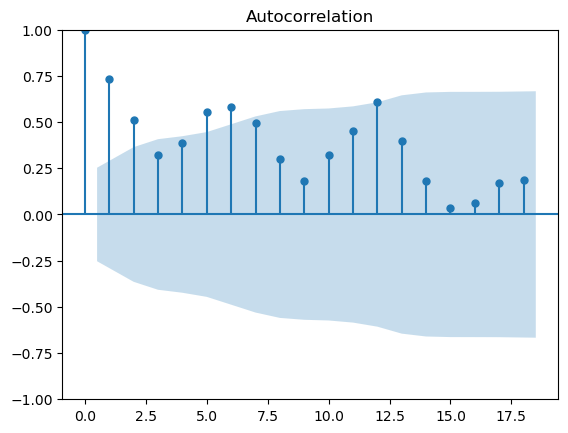

In [10]:
# Plot the auto-correlation by including the time series inside the function.

#Auto-correlation plot
plot_acf(df.revenue);
# The period that correlates the most, and therefore, has the most information is the month just before. 
# The second period with the most information is the one 12 months before.

# 5. Train a Holt-Winters Model
Split the data into training and test sets. The test data should have 3 months. Fit a Holt-Winters model to the data. Since the Time Series is plateauing, set the parameters of trend and seasonal cycles to additive.

In [11]:
# Split the data into training and test set. Slice the data by isolating the last 3 months as test data.

#Training and test set
test_months = 3
training = df.iloc[:-test_months, :]
test = df.iloc[-test_months:, :]
test.tail()

,revenue
Month with Year,
2022-10-01,3707
2022-11-01,4858
2022-12-01,3476


In [12]:
# Build the Holt-Winters model by specifying the Trend and Seasonal model types, and the seasonality frequency.

#forecasting model
#endog is the time series
#trend and seasonal can be either 'add' or 'mul' for additive and multiplicative
#seasonal_periods is the frequency of the data. 
model = ExponentialSmoothing(endog = training.revenue,
                             trend = 'add',
                             seasonal = 'add',
                             seasonal_periods = 12).fit()

# 6. Predict and Visualize the Predictions with the Historical Data
Use the Holt-Winters model to predict the 3 months, same as the test data. Plot the training (only 2022), test, and predictions, then make an initial assessment of the model.

In [13]:
# Use the predict function for the forecast.

#predictions
#steps is the forecasting horizon. 
#The series is optionally renamed to HW to improve the visualization afterward
predictions = model.forecast(steps = len(test)).rename("HW")
predictions.head()

2022-10-01    3836.237652
2022-11-01    4707.649069
2022-12-01    3519.960265
Freq: MS, Name: HW, dtype: float64

<Axes: xlabel='Month with Year'>

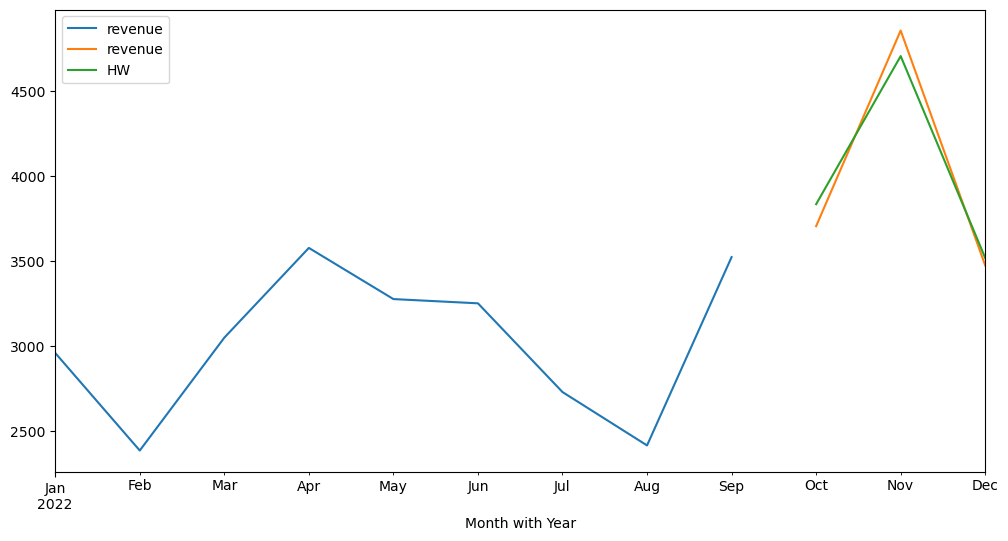

In [14]:
# Plot the training, test, and predictions. Include only the training data after 2022 for a better visualization.

#visualization
#Customize the plot size with the figsize parameter to improve the visualization
#Set legend = True to include a legend of the line graphs
training['revenue']['2022-01-01':].plot(figsize = (12,6), legend = True)
test['revenue'].plot(legend = True)
predictions.plot(legend = True)
# The model predictions follow the test data extremely closely. The month with the largest deviation is November.

# 7. Assess the Model with MAE and RMSE
Import the functions in the documentation to evaluate the model. Use the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [15]:
# Import the mean_squared_error and mean_absolute_error functions

#Import functions MAE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
# Use both functions to assess the error. 
# Utilize the squared  = False parameter in the mean_squared_error function to get the RMSE.

#Assessing accuracy with the MAE and RMSE
print(mean_absolute_error(test['revenue'], predictions))
print(mean_squared_error(test['revenue'], predictions, squared = False))

107.84961588310232
117.24657485649146


# 8. Predict the Next Quarter
Use the complete data in the model and predict the next 3 months. Visualize the results and interpret them. Compute the growth expected for Q1 2023.

In [17]:
# Build the final model feeding the complete data to it with the ExponentialSmoothing function.

#forecasting model with the complete time series
#endog is the time series
#trend and seasonal can be either 'add' or 'mul' for additive and multiplicative
#seasonal_periods is the frequency of the data. 
model_final = ExponentialSmoothing(endog = df.revenue,
                             trend = 'add',
                             seasonal = 'add',
                             seasonal_periods = 12).fit()

In [18]:
# Make the predictions for the next 3 months with the predict function.

#predictions
#steps is the forecasting horizon. 
#The series is optionally renamed to HW to improve the visualization afterward
predictions_final = model_final.forecast(steps = 3).rename("HW")
predictions_final.head()

2023-01-01    3463.901697
2023-02-01    2898.042047
2023-03-01    3456.976237
Freq: MS, Name: HW, dtype: float64

<Axes: xlabel='Month with Year'>

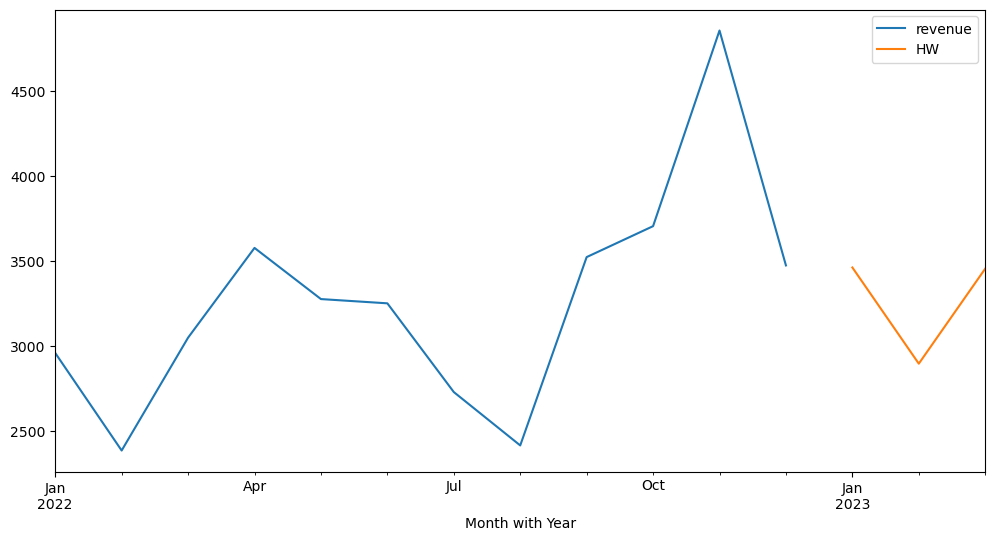

In [19]:
# Visualize the data and predictions by using the plot function.

#visualization
#Customize the plot size with the figsize parameter to improve the visualization
#Set legend = True to include a legend of the line graphs
df['revenue']['2022-01-01':].plot(figsize = (12,6), legend = True)
predictions_final.plot(legend = True)

In [20]:
# Compute the growth for Q1 2023 by summing the values of the predictions and 
# dividing by the sum of the values in Q1 2022.

#Compute the growth expected for Q1 2023
predictions_final.sum() / df['revenue']['2022-01-01':'2022-03-01'].sum() - 1
# The growth expected is 16.9%.

0.16905821901027007